# User Profile Analysis

In [2]:
import os
import subprocess
from pyspark.sql.functions import *
from pyspark.sql.types import *
from pyspark.sql.types import StructType

import findspark
findspark.init()
spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext


In [3]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import re
import string
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
user_twt_pdf = pd.read_csv('user_twt_pdf.csv')
user_twt_pdf.head(5)

C:\Users\vbatt\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,x_user_name,x_user_scrname,x_user_desc,x_user_location,x_user_id,covid_twt_count,total_tweet_count,avg_retwt_count,followers_count
0,0,"Robert W Malone, MD",RWMaloneMD,"Inventor of mRNA vaccines and RNA as a drug, B...","Madison, VA",3.984488e+07,27532.0,8521.0,1333.550305,473202.0
1,1,Disclose.tv,disclosetv,Observing world events unfold in the grand the...,NaN,1.539249e+07,21596.0,3789.0,2459.135812,736174.0
2,2,Karan Menon,TheKaranMenon,"comedian from jersey, woke tiktok king, featur...","Holmdel, NJ",1.049540e+18,16271.0,223.0,11724.467826,23226.0
3,3,Chuck Callesto,ChuckCallesto,Father and Former Candidate for Florida's 3rd ...,"Florida, USA",4.765364e+09,13755.0,31375.0,2092.251472,285801.0
4,4,윤서⁷,btsinthemoment,for #bts 아포방포 translations — 🇰🇷🇦🇺 he / prince ...,speedy,1.333743e+18,13675.0,4549.0,6298.398245,94746.0


In [10]:
#remove users with covid tweet count less than 5 and followers less then 10
user_twt_pdf = user_twt_pdf[user_twt_pdf['covid_twt_count'] > 5]
user_twt_pdf = user_twt_pdf[user_twt_pdf['followers_count'] > 10]
user_twt_pdf.shape

(30529, 10)

In [11]:
user_desc = user_twt_pdf[['x_user_scrname','x_user_desc']]
user_desc.head()

,x_user_scrname,x_user_desc
0,RWMaloneMD,"Inventor of mRNA vaccines and RNA as a drug, B..."
1,disclosetv,Observing world events unfold in the grand the...
2,TheKaranMenon,"comedian from jersey, woke tiktok king, featur..."
3,ChuckCallesto,Father and Former Candidate for Florida's 3rd ...
4,btsinthemoment,for #bts 아포방포 translations — 🇰🇷🇦🇺 he / prince ...


In [22]:
ctwt_users_pdf.head()

,name,screen_name,description,location,verified,count(id)
0,#StayHome,viralvideovlogs,news news news and trends\n\nhttps://youtu.be/...,കേരളം,False,1740
1,Nathan Joyner,njoyflyfishing,Global Venture Captial and Private Equity/Busi...,"Los Angeles, CA",False,1199
2,Majambo Portal,MajamboKE,Celebrities | Gossip | Nature | News | Politic...,None,False,1034
3,CovidOff Bot 🤖,mlb0t,"We connect lives to rescuers, tweet that conta...",India 🇮🇳,False,916
4,Public Health Data Science,PublicHealthBot,Interested in #PublicHealth and #DataScience. ...,"England, United Kingdom",False,861


In [13]:
user_prof_pdf = pd.read_csv('user_prof_full_df.csv')
user_prof_pdf

C:\Users\vbatt\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,x_user_scrname,x_user_desc,x_user_location,x_user_id,x_user_url,covid_twt_count,retwt_count,followers_count
0,0.0,ClayTravis,"http://Outkick.com, @outkick @clayandbuck radi...",Nashville,5.077292e+07,http://www.outkick.com,157102.0,16859.0,853678.0
1,1.0,PeterSweden7,I'm Peter Imanuelsen | Swedish journalist | Po...,"Møre og Romsdal, Norway",7.072315e+17,http://www.petersweden.com,96646.0,20581.0,264688.0
2,2.0,thebradfordfile,liberal hypocrisy is a disease,America,3.406939e+09,http://thebradfordfile.com,55361.0,11416.0,292897.0
3,3.0,PeterSweden7,I'm Peter Imanuelsen | Swedish journalist | Po...,"Møre og Romsdal, Norway",7.072315e+17,http://www.petersweden.com,52580.0,18508.0,229074.0
4,4.0,earthangeleve,♍︎ ⊙ ♑︎ ☽ 18+ • writer. healer. earth mystic. ...,Eden,3.443196e+08,https://linktr.ee/earthangeleve,51914.0,82960.0,6021.0
...,...,...,...,...,...,...,...,...,...
207137,207133,z_007_z,The FORCE is STRONG in this ONE.\r\nIt is a pe...,Planet Earth,3.233264e+07,NaN,6.0,0.0,4487.0
207138,207134,CeleREDUX,I'm famous\n\nNSFW retweets(turn off my retwee...,Tantal,1.170914e+18,NaN,6.0,7.0,277.0
207139,207135,GodofKrypton,"Eph '12, EHS '07, FSU, GB, Syvad; Give me tira...","Titletown, USA",3.920219e+07,http://google.com,6.0,3.0,2135.0
207140,207136,binn2b,NaN,NaN,4.440452e+09,NaN,6.0,7.0,537.0


In [17]:
top_tweeters = user_prof_pdf.head(10)
# top_tweeters

In [18]:
top_tweeters = top_tweeters[['x_user_scrname','covid_twt_count']]
top_tweeters.set_index('x_user_scrname', inplace=True)

''

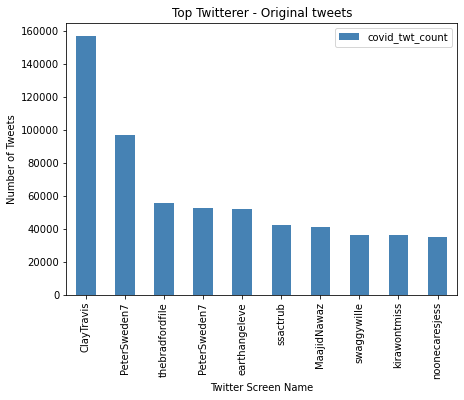

In [23]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (7,5)

top_tweeters.plot.bar(color='steelblue')
plt.title("Top Twitterer - Original tweets")
plt.ylabel("Number of Tweets")
plt.xlabel("Twitter Screen Name")
;

In [31]:
top_retweeter = user_prof_pdf.sort_values('retwt_count',ascending=False)

In [34]:
top_retweeter = top_retweeter.head(10)

In [35]:
top_retweeter = top_retweeter[['x_user_scrname','retwt_count']]
top_retweeter.set_index('x_user_scrname', inplace=True)


''

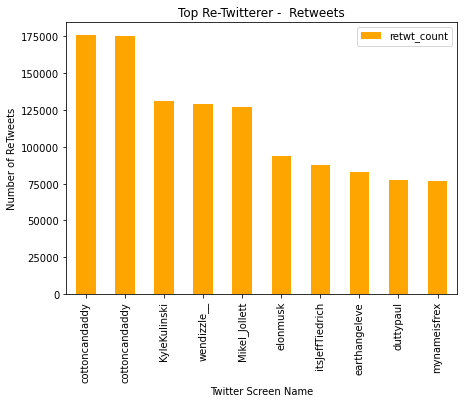

In [38]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (7,5)

top_retweeter.plot.bar(color='orange')
plt.title("Top Re-Twitterer -  Retweets")
plt.ylabel("Number of ReTweets")
plt.xlabel("Twitter Screen Name")
;

# Time Line analysis
